Objective:
The goal of this project is to predict flight ticket price using regression models.

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
from ydata_profiling import ProfileReport
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [255]:
flight_df = pd.read_excel('Flight_Fare.xlsx')
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [256]:
flight_df.shape

(10683, 11)

In [257]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [258]:
flight_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Exploratory Data Analysis

In [259]:
flight_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [260]:
flight_df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


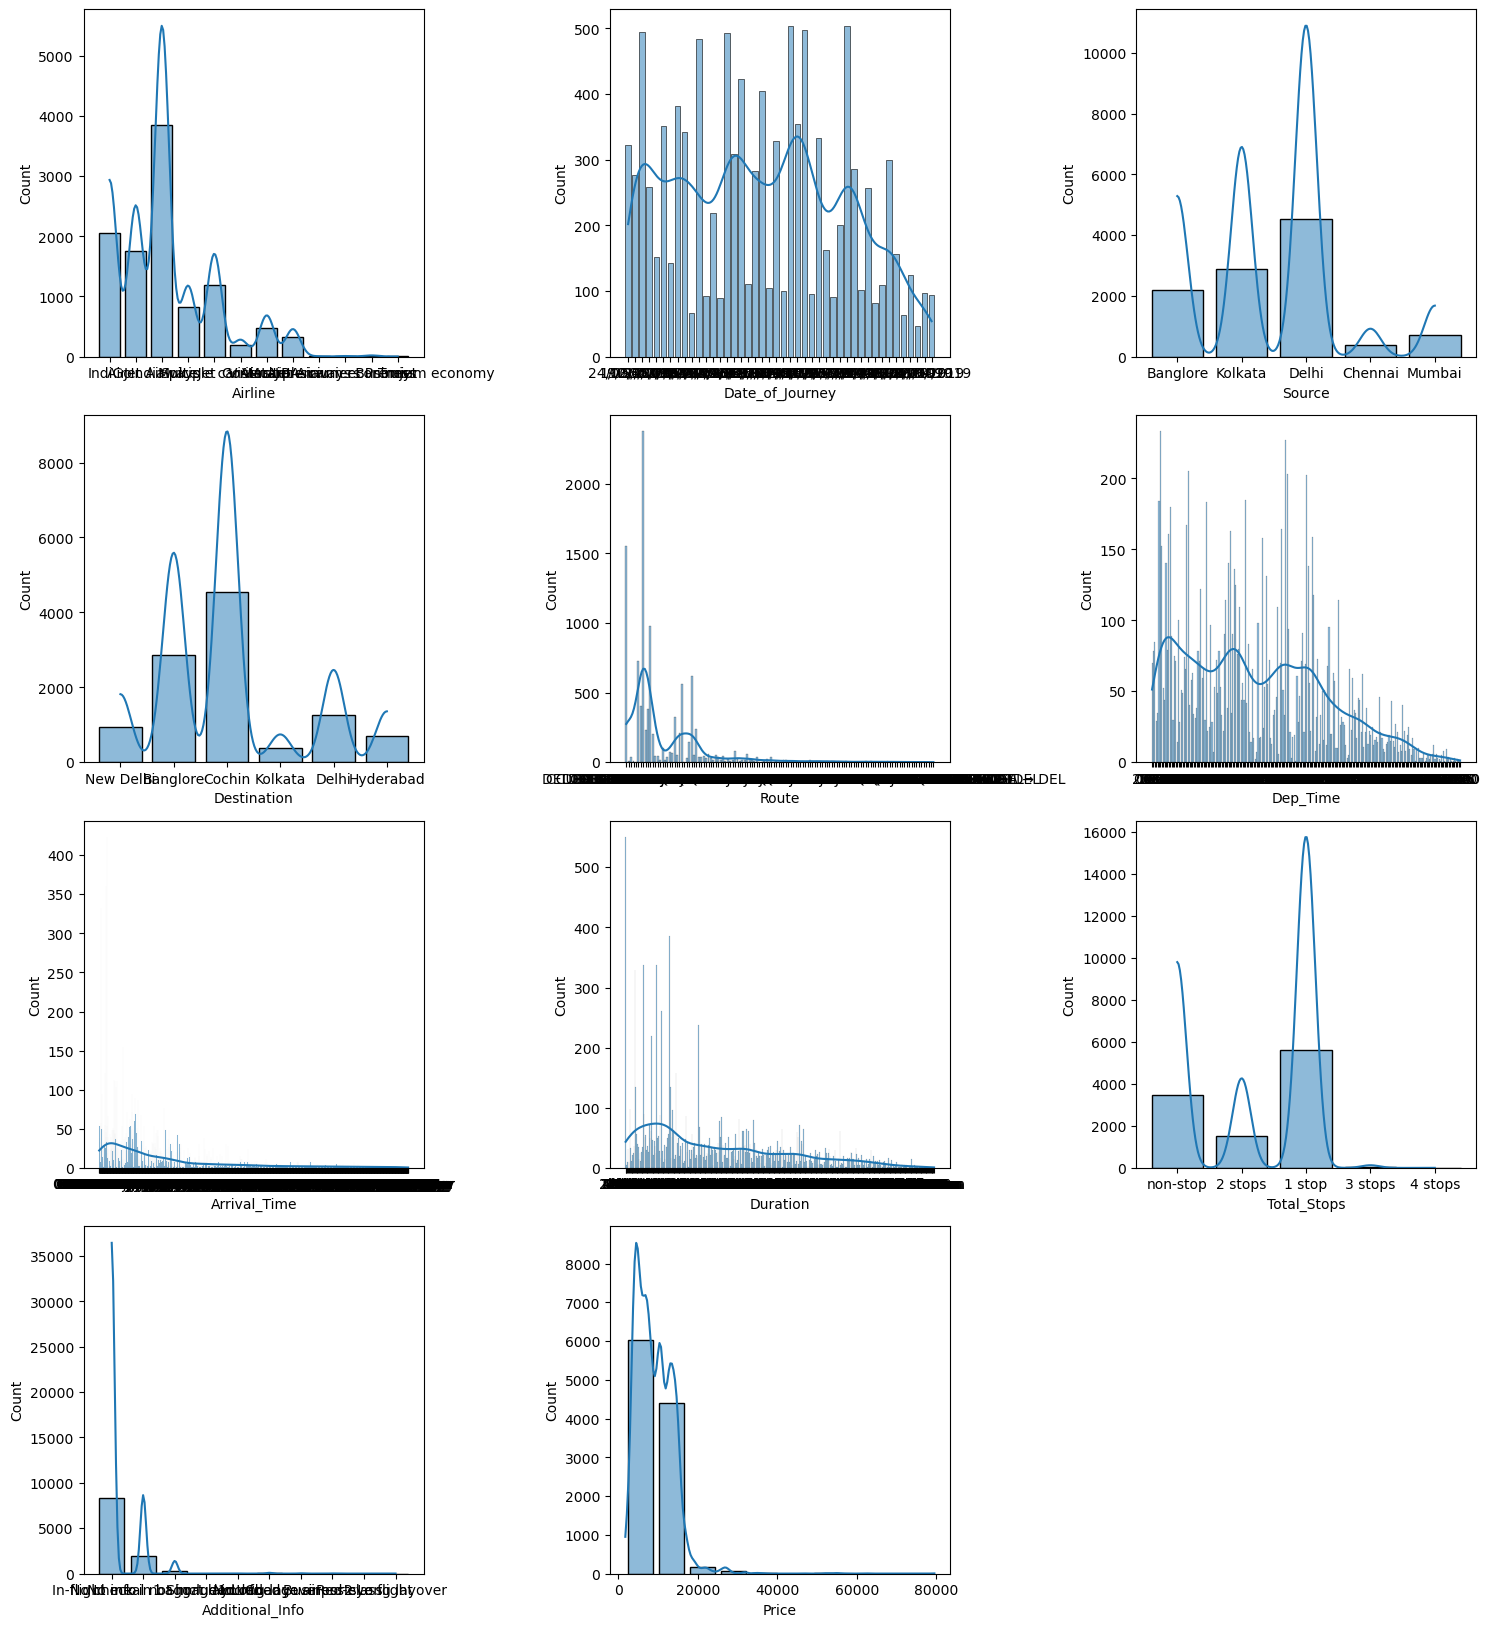

In [261]:
plt.figure(figsize=(15,20))
pos = 1
for i in flight_df.columns:
    plt.subplot(5,3,pos)
    sns.histplot(flight_df[i], bins=10, kde=True, shrink=0.8)
    pos=pos+1
plt.tight_layout()

In [262]:
profile = ProfileReport(flight_df, title="EDA Summary", explorative = True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 12.13it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Data Preprocessing and Feature Engineering

In [263]:
flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [264]:
flight_df['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [265]:
flight_df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [266]:
for colname in ['Route','Total_Stops']:
   flight_df[colname] = flight_df[colname].fillna(flight_df[colname].mode()[0])
    

In [267]:
flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [268]:
flight_df.duplicated().sum()

220

In [269]:
flight_df[flight_df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [270]:
flight_df.drop_duplicates(inplace=True)

In [271]:
flight_df.duplicated().sum()

0

In [272]:
#splitting Date_of_Journey column for better ML performance
flight_df['Day_of_Journey'] = pd.to_datetime(flight_df['Date_of_Journey']).dt.day
flight_df['month_of_Journey'] = pd.to_datetime(flight_df['Date_of_Journey']).dt.month
flight_df['year_of_Journey'] = pd.to_datetime(flight_df['Date_of_Journey']).dt.year

#splitting Dep_Time column for better ML performance
flight_df['Dep_hour'] = pd.to_datetime(flight_df['Dep_Time']).dt.hour
flight_df['Dep_min']  = pd.to_datetime(flight_df['Dep_Time']).dt.minute

#splitting Arrival_Time column using first space
time_date_split = flight_df['Arrival_Time'].str.split(' ', n=1, expand=True)
flight_df['Arrival_hour'] = pd.to_datetime(time_date_split[0]).dt.hour
flight_df['Arrival_min']  = pd.to_datetime(time_date_split[0]).dt.minute

flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,year_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [273]:
#creation of duration_mins column to keep all values in same format
def new_duration_fn(x):
    x = str(x).strip()
    hours = 0
    mins = 0

    if 'h' in x:
        hours = int(x.split('h')[0])
    if 'm' in x:
        mins_part = x.split('h')[-1].split('m')[0].strip()
        if mins_part != '':
            mins = int(mins_part)

    duration_in_min = (hours * 60) + mins
    return duration_in_min

flight_df['Duration_mins'] = flight_df['Duration'].apply(new_duration_fn)
flight_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,year_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25,150
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,8,20,11,20,180
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10,160


In [274]:
#dropping old duration column
flight_df.drop(['Date_of_Journey','Route','Dep_Time', 'Arrival_Time', 'Duration'], axis=1, inplace=True)
flight_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,year_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,285


In [275]:
num_cols = flight_df.select_dtypes(exclude='O')
num_cols

,Price,Day_of_Journey,month_of_Journey,year_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins
0,3897,24,3,2019,22,20,1,10,170
1,7662,1,5,2019,5,50,13,15,445
2,13882,9,6,2019,9,25,4,25,1140
3,6218,12,5,2019,18,5,23,30,325
4,13302,1,3,2019,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...
10678,4107,9,4,2019,19,55,22,25,150
10679,4145,27,4,2019,20,45,23,20,155
10680,7229,27,4,2019,8,20,11,20,180
10681,12648,1,3,2019,11,30,14,10,160


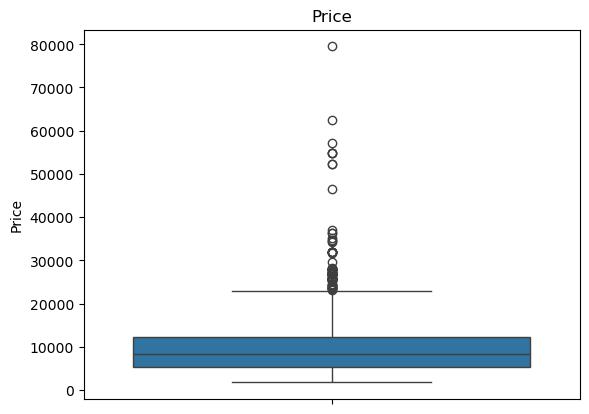

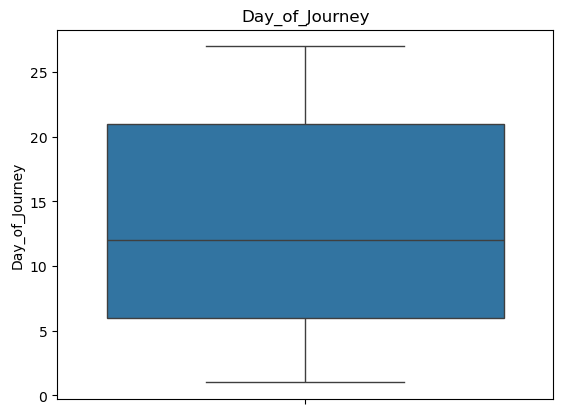

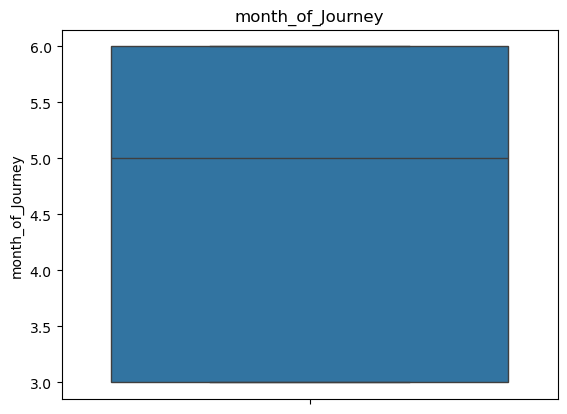

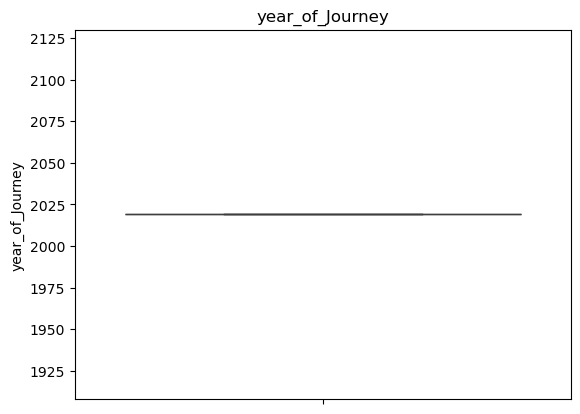

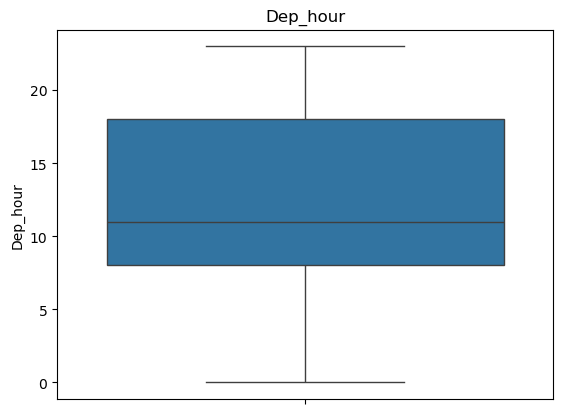

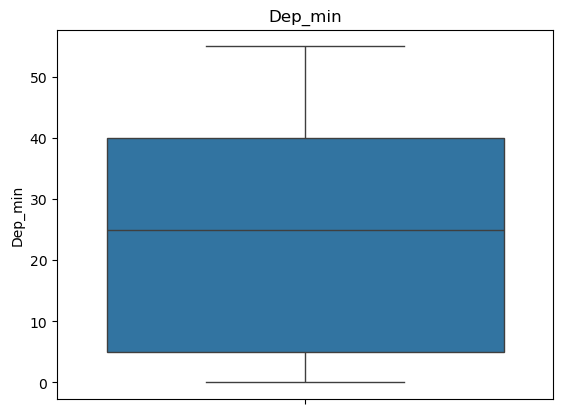

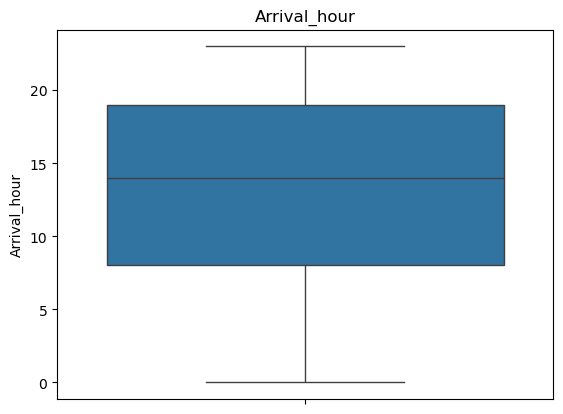

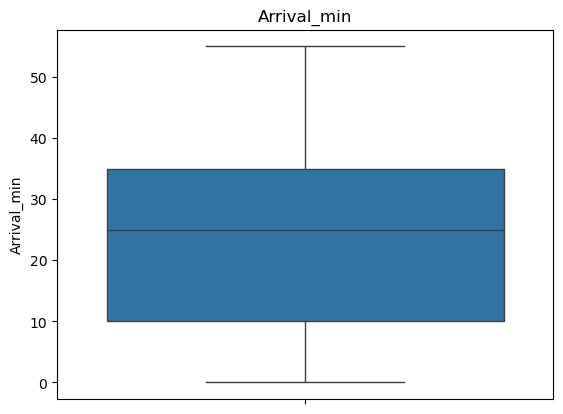

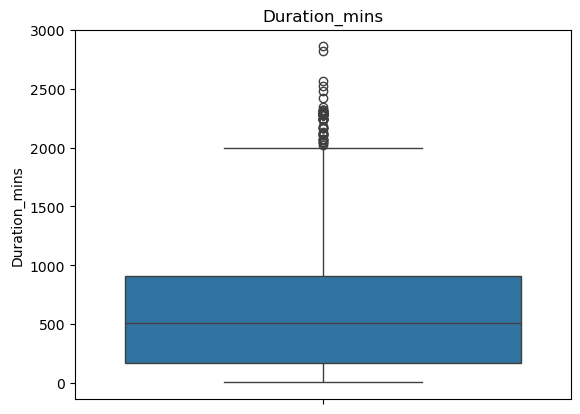

In [276]:
for col in num_cols:
    sns.boxplot(flight_df[col])
    plt.title(col)
    plt.show()

In [277]:
#Handling outliers using IQR
for col in ['Price', 'Duration_mins']:
    Q1 = flight_df[col].quantile(0.25)
    Q3 = flight_df[col].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    flight_df[col] = np.where(flight_df[col]<lower_bound, lower_bound, np.where(flight_df[col]>upper_bound, upper_bound,flight_df[col]))

In [278]:
df=flight_df.sort_values(by='Price', ascending=True)
df.tail(10)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,year_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins
10113,Jet Airways,Banglore,New Delhi,1 stop,No info,23022.75,1,3,2019,7,0,13,15,375.0
8470,Jet Airways,Banglore,New Delhi,1 stop,No info,23022.75,1,3,2019,14,5,20,20,375.0
1629,Air India,Banglore,New Delhi,2 stops,No info,23022.75,1,3,2019,8,50,10,35,1545.0
6576,Jet Airways,Banglore,New Delhi,1 stop,1 Long layover,23022.75,1,3,2019,18,40,9,30,890.0
2924,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,23022.75,1,3,2019,5,45,11,25,340.0
10383,Jet Airways,Banglore,New Delhi,1 stop,No info,23022.75,1,3,2019,7,0,5,5,1325.0
1246,Jet Airways,Banglore,New Delhi,1 stop,No info,23022.75,1,3,2019,8,55,16,10,435.0
1478,Jet Airways,Banglore,New Delhi,1 stop,No info,23022.75,18,3,2019,18,40,0,45,365.0
3535,Air India,Banglore,New Delhi,1 stop,Change airports,23022.75,1,3,2019,11,50,23,55,725.0
7356,Multiple carriers,Delhi,Cochin,1 stop,No info,23022.75,1,3,2019,0,20,13,20,780.0


In [279]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10463 non-null  object 
 1   Source            10463 non-null  object 
 2   Destination       10463 non-null  object 
 3   Total_Stops       10463 non-null  object 
 4   Additional_Info   10463 non-null  object 
 5   Price             10463 non-null  float64
 6   Day_of_Journey    10463 non-null  int32  
 7   month_of_Journey  10463 non-null  int32  
 8   year_of_Journey   10463 non-null  int32  
 9   Dep_hour          10463 non-null  int32  
 10  Dep_min           10463 non-null  int32  
 11  Arrival_hour      10463 non-null  int32  
 12  Arrival_min       10463 non-null  int32  
 13  Duration_mins     10463 non-null  float64
dtypes: float64(2), int32(7), object(5)
memory usage: 940.0+ KB


In [307]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']
numeric_cols = flight_df.select_dtypes(exclude='O').columns.tolist()
#Removing target column Price form this list
numeric_cols = numeric_cols[1:]

# OneHotEncoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)], remainder='passthrough')

In [308]:
from sklearn.model_selection import train_test_split
# Split
X = flight_df.drop('Price', axis=1)
y = flight_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

Linear Regression

In [334]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_encoded, y_train)
y_pred_lr = model.predict(X_test_encoded)

In [335]:
from sklearn.metrics import r2_score
print("R²:", r2_score(y_test, y_pred_lr))

R²: 0.7069575011189647


RandomForest Regression

In [336]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=300,        # more trees for smoother averaging
    max_depth=12,            # limit tree complexity slightly
    min_samples_split=5,     # ensure splits happen with enough samples
    min_samples_leaf=3,      # avoid overfitting tiny leaves
    random_state=42,
    n_jobs=-1                # use all CPU cores (faster)
)
model.fit(X_train_encoded, y_train)
y_pred_rfr = model.predict(X_test_encoded)


In [337]:
from sklearn.metrics import r2_score
print("R²:", r2_score(y_test, y_pred_rfr))

R²: 0.9053659071845276


In [338]:
y_train_pred = model.predict(X_train_encoded)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_pred_rfr))

Train R²: 0.949052621477165
Test R²: 0.9053659071845276


In [339]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_encoded, y_train, scoring='r2', cv=5)
print("Cross-val mean R²:", scores.mean())
print("Cross-val std:", scores.std())

Cross-val mean R²: 0.9022882903133013
Cross-val std: 0.004208173225688592


XGBoost Regression

In [340]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(
    n_estimators=300,         # number of boosting rounds
    learning_rate=0.1,        # how much each tree contributes
    max_depth=8,              # tree depth
    subsample=0.8,            # use 80% of data per tree
    colsample_bytree=0.8,     # use 80% of features per tree
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train_encoded, y_train)
y_pred_xgbr = xgb_model.predict(X_test_encoded)

In [341]:
print("R²:", r2_score(y_test, y_pred_xgbr))

R²: 0.9237033872992033


GradientBoostRegression

In [342]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    n_estimators=300,       # number of boosting stages
    learning_rate=0.1,      # how much each tree contributes
    max_depth=5,            # max depth per tree
    random_state=42
)

gbr.fit(X_train_encoded, y_train)
y_pred_gbr = gbr.predict(X_test_encoded)

In [343]:
print("R²:", r2_score(y_test, y_pred_gbr))

R²: 0.9145593579700169


Model Comparison

In [344]:
from sklearn.metrics import*

# Create a function to compute metrics
def get_metrics(model_name, y_test, y_pred):
    return {
        'Model': model_name,
        'R² Score': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False)
    }

# Store results
results = []
results.append(get_metrics('Linear Regression', y_test, y_pred_lr))
results.append(get_metrics('Random Forest', y_test, y_pred_rfr))
results.append(get_metrics('XGBoost', y_test, y_pred_xgbr))
results.append(get_metrics('GradientBoost', y_test, y_pred_gbr))
# Convert to DataFrame
comparison_df = pd.DataFrame(results)


In [345]:
print(comparison_df)

               Model  R² Score          MAE         RMSE
0  Linear Regression  0.706958  1690.188763  2297.588476
1      Random Forest  0.905366   730.366766  1305.661960
2            XGBoost  0.923703   614.592229  1172.356156
3      GradientBoost  0.914559   751.807964  1240.621180


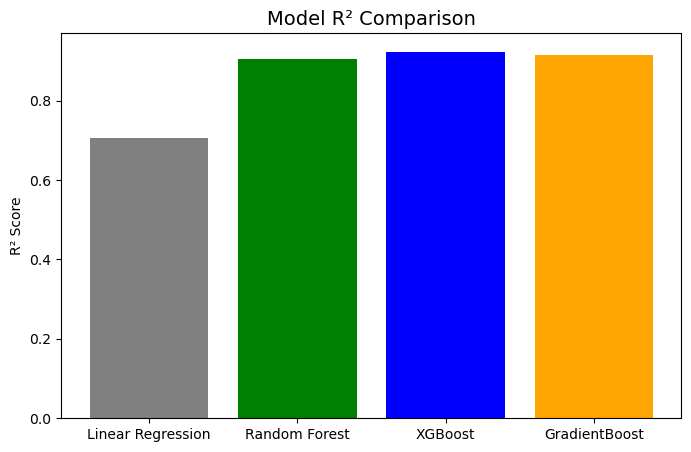

In [346]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(comparison_df['Model'], comparison_df['R² Score'], color=['gray', 'green', 'blue', 'orange'])
plt.title("Model R² Comparison", fontsize=14)
plt.ylabel("R² Score")
plt.show()

Performance Analysis:

Linear Regression:
Served as a baseline model. It captured general linear trends but performed poorly due to the highly non-linear relationships in flight price data.

Random Forest:
Significantly improved accuracy (R² ≈ 0.905) by handling non-linear patterns and feature interactions. However, it showed minor overfitting at higher depths.

Gradient Boosting:
Performed comparably to Random Forest, offering smoother generalization but slightly higher MAE and RMSE.

XGBoost:
Achieved the best overall performance (R² ≈ 0.924) with the lowest MAE and RMSE. Its gradient boosting mechanism and regularization effectively minimized both bias and variance, making it the most accurate and stable model.

It demonstrates:

- Highest R² (0.9237) → captures 92.4% of price variance

- Lowest prediction errors (MAE: ₹614, RMSE: ₹1172)

- Excellent balance between accuracy, generalization, and computational efficiency

Challengers:

- Missing and Inconsistent Values: Columns like Additional_Info contained “No Info” and missing entries.
- Irregular Time and Duration Formats: Dep_Time, Arrival_Time, and Duration had mixed formats (e.g., “6h 2m”, “2h”, “45m”).
- Extracting Date Components: Date_of_Journey and Arrival_Date contained date strings.
- Outliers in Price: Price values showed extreme variations.

Future scope:
- In the future, this model can be enhanced by including additional factors such as holiday seasons, weather, and demand trends to improve prediction accuracy.
- It can also be deployed using tools like Streamlit or Flask for real-time fare prediction and periodically retrained to adapt to changing market conditions.

Conclusion:

- Through systematic data cleaning, preprocessing, and feature engineering, the dataset was transformed into a format suitable for model training. -  -  Multiple regression models — Linear Regression, Random Forest, Gradient Boosting, and XGBoost — were implemented and evaluated using performance metrics like R², MAE, and RMSE.
-Among all models, the XGBoost Regressor achieved the best performance.
- The model effectively captures complex non-linear relationships between flight characteristics and ticket prices.
- This solution can be leveraged by both customers (to plan trips and estimate fares) and airline companies (for pricing optimization and revenue management).

In conclusion, the XGBoost-based flight price prediction model provides a robust, data-driven approach to forecast flight fares with high accuracy, demonstrating the power of machine learning in aviation analytics.